In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
#from google.colab import files
#files = files.upload()
dataset_path = pd.read_csv('breast-cancer.csv')

Saving breast-cancer.csv to breast-cancer (5).csv


In [0]:
dataset_path.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [0]:
dataset=dataset_path.copy()
dataset=dataset.drop(['id','Unnamed: 32'],axis=1)
dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [0]:
dataset.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [0]:
le=preprocessing.LabelEncoder()

In [0]:
dataset['diagnosis']=le.fit_transform(dataset['diagnosis'])

In [0]:
dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [0]:
train_dataset = dataset.sample(frac=0.7,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [0]:
train_dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
498,1,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,0.06697,0.7923,1.0450,4.851,95.77,0.007974,0.03214,0.04435,0.015730,0.01617,0.005255,22.75,22.88,146.40,1600.0,0.1412,0.3089,0.3533,0.16630,0.2510,0.09445
161,1,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,1.0000,0.6336,6.971,119.30,0.009406,0.03055,0.04344,0.027940,0.03156,0.003362,22.03,17.81,146.60,1495.0,0.1124,0.2016,0.2264,0.17770,0.2443,0.06251
83,1,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,0.5190,2.9100,5.801,67.10,0.007545,0.06050,0.02134,0.018430,0.03056,0.010390,20.33,32.72,141.30,1298.0,0.1392,0.2817,0.2432,0.18410,0.2311,0.09203
117,1,14.87,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,0.4266,0.9489,2.989,41.18,0.006985,0.02563,0.03011,0.012710,0.01602,0.003884,18.81,27.37,127.10,1095.0,0.1878,0.4480,0.4704,0.20270,0.3585,0.10650
374,0,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,0.05669,0.1705,0.5066,1.372,14.00,0.004230,0.01587,0.01169,0.006335,0.01943,0.002177,14.84,20.21,99.16,670.6,0.1105,0.2096,0.1346,0.06987,0.3323,0.07701


In [0]:
test_dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
551,0,11.13,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,0.2800,1.467,1.994,17.85,0.003495,0.03051,0.034450,0.010240,0.02912,0.004723,12.020,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
556,0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.090,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
558,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,0.2254,1.108,2.224,19.54,0.004242,0.04639,0.065780,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.02982,0.057380,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.000000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039


In [0]:
train_data = train_dataset.drop('diagnosis',axis=1)
train_labels = train_dataset['diagnosis']

In [0]:
test_data = test_dataset.drop('diagnosis',axis=1)
test_labels = test_dataset['diagnosis']

In [0]:
test_data.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
551,11.13,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,0.2800,1.467,1.994,17.85,0.003495,0.03051,0.034450,0.010240,0.02912,0.004723,12.020,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032
556,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,0.2441,2.090,1.648,16.80,0.012910,0.02222,0.004174,0.007082,0.02572,0.002278,10.650,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742
558,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,0.2254,1.108,2.224,19.54,0.004242,0.04639,0.065780,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,0.1388,0.06570,0.2388,2.904,1.936,16.97,0.008200,0.02982,0.057380,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.000000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.000000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039


In [0]:
train_stats = train_data.describe()
#train_stats.pop("diagnosis")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,398.0,14.038842,3.454239,6.981000,11.710000,13.255000,15.977500,28.11000
texture_mean,398.0,19.230402,4.434062,9.710000,16.040000,18.725000,21.795000,39.28000
perimeter_mean,398.0,91.323719,23.834134,43.790000,75.065000,85.740000,104.250000,188.50000
area_mean,398.0,645.574623,337.383235,143.500000,420.475000,541.700000,792.025000,2499.00000
smoothness_mean,398.0,0.096168,0.014053,0.065760,0.085170,0.094895,0.105050,0.16340
compactness_mean,398.0,0.102263,0.052176,0.032120,0.061110,0.088630,0.130400,0.34540
concavity_mean,398.0,0.085767,0.078784,0.000000,0.026857,0.054630,0.126675,0.42680
concave points_mean,398.0,0.047396,0.037824,0.000000,0.019682,0.032010,0.068575,0.20120
symmetry_mean,398.0,0.181002,0.026952,0.106000,0.163025,0.179200,0.195850,0.29060
fractal_dimension_mean,398.0,0.062840,0.007047,0.050240,0.057650,0.061310,0.066380,0.09575


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

#Model 1 with learning rate 0.01

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(1,input_shape=[30],activation=tf.nn.sigmoid)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model=build_model()

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
95,0.020249,0.993711,0.279794,0.925,95
96,0.019793,0.993711,0.280962,0.925,96
97,0.020006,0.993711,0.282127,0.925,97
98,0.019798,0.993711,0.282978,0.925,98
99,0.019806,0.993711,0.283243,0.925,99


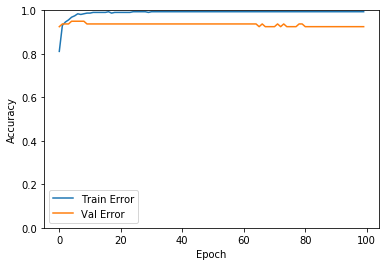

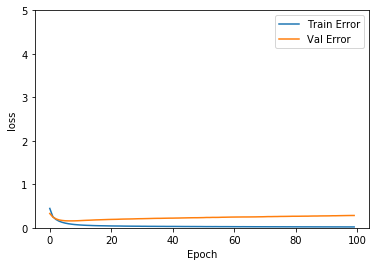

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()
plot_history(history)


....................

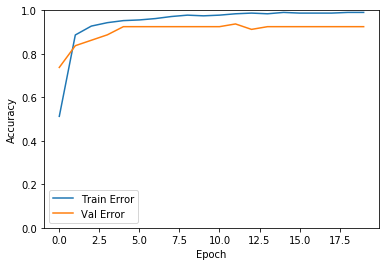

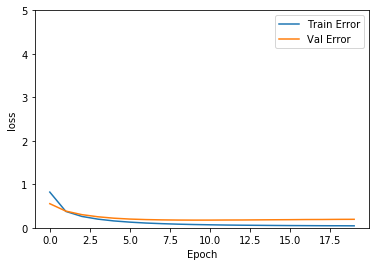

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing loss : {:5.2f} ".format(loss))
print("Testing accuracy : {:5.2f} ".format(accuracy))

Testing loss :  0.03 
Testing accuracy :  0.99 


#model 2 with learning rate 0.1( Best Model)

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(1,input_shape=[30],activation=tf.nn.sigmoid)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.1)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model=build_model()

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
95,0.004698,1.000000,0.730737,0.9250,95
96,0.003466,1.000000,0.728271,0.9250,96
97,0.006531,1.000000,0.755729,0.9250,97
98,0.003589,1.000000,0.752473,0.9125,98
99,0.005503,0.996855,0.730619,0.9250,99


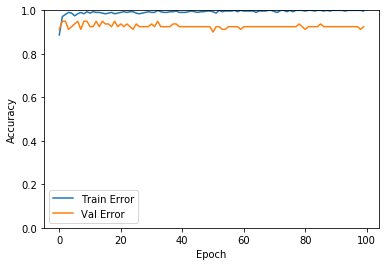

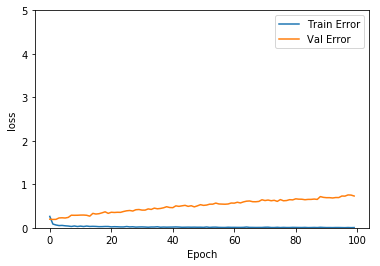

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()
plot_history(history)


............

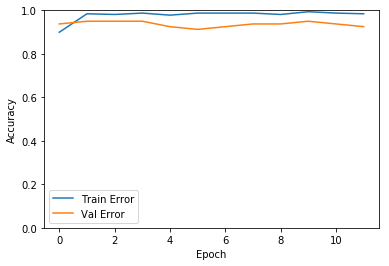

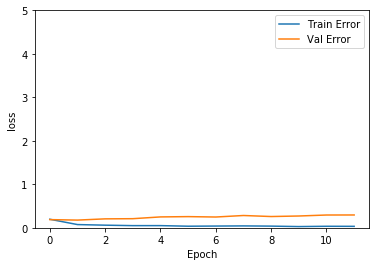

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing loss : {:5.2f} ".format(loss))
print("Testing accuracy : {:5.2f} ".format(accuracy))

Testing loss :  0.02 
Testing accuracy :  0.99 


In [146]:
history.epoch[-1]

11

#Model 3 with learning rate 0.6


In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(1,input_shape=[30],activation=tf.nn.sigmoid)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.6)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model=build_model()

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
95,0.000012,1.000000,2.577406,0.9125,95
96,0.000010,1.000000,2.564625,0.9125,96
97,0.000009,1.000000,2.555467,0.9125,97
98,0.000013,1.000000,2.546012,0.9000,98
99,0.055825,0.996855,2.474443,0.9250,99


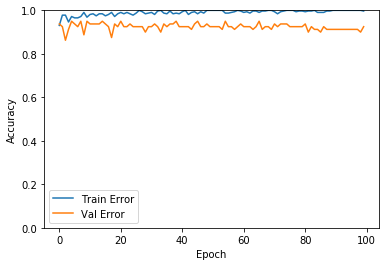

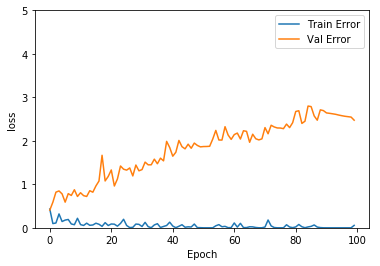

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()
plot_history(history)


...........

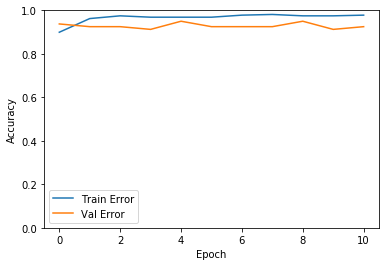

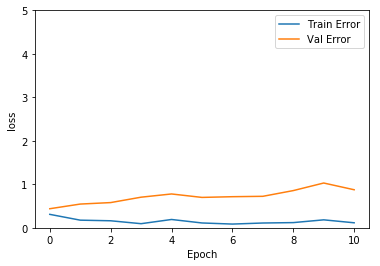

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing loss : {:5.2f} ".format(loss))
print("Testing accuracy : {:5.2f} ".format(accuracy))

Testing loss :  0.06 
Testing accuracy :  0.98 


#Model 4 with learning rate 0.7


In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(1,input_shape=[30],activation=tf.nn.sigmoid)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.7)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model=build_model()

In [0]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
95,0.000637,1.0,2.628650,0.9375,95
96,0.000290,1.0,2.589346,0.9375,96
97,0.000121,1.0,2.587888,0.9375,97
98,0.000104,1.0,2.580888,0.9375,98
99,0.000087,1.0,2.563013,0.9250,99


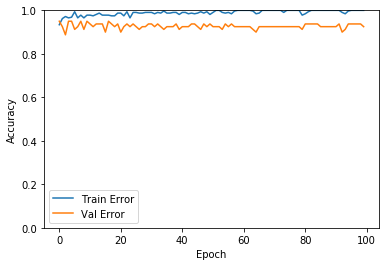

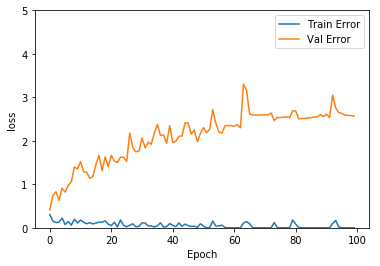

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()
plot_history(history)


...........

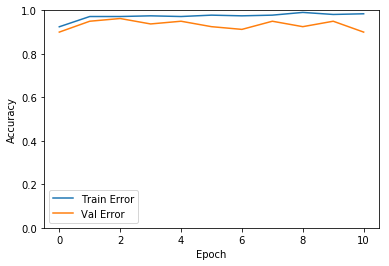

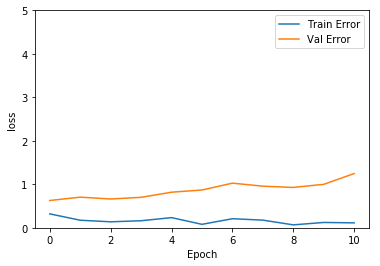

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing loss : {:5.2f} ".format(loss))
print("Testing accuracy : {:5.2f} ".format(accuracy))

Testing loss :  0.16 
Testing accuracy :  0.98 


# model 5 with learning rate 0.05

In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(1,input_shape=[30],activation=tf.nn.sigmoid)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.05)

  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [0]:
model=build_model()

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
95,0.008613,1.000000,0.519380,0.925,95
96,0.008258,1.000000,0.518140,0.925,96
97,0.008460,1.000000,0.523106,0.925,97
98,0.007874,0.996855,0.525446,0.925,98
99,0.007424,0.996855,0.527631,0.925,99


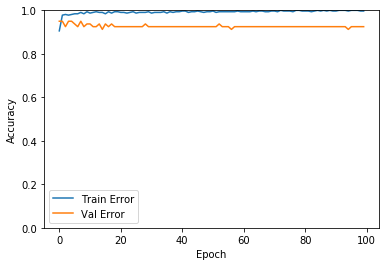

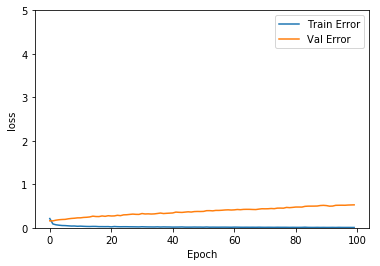

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()
plot_history(history)


............

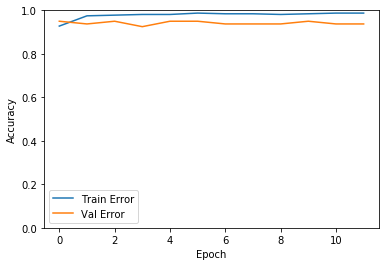

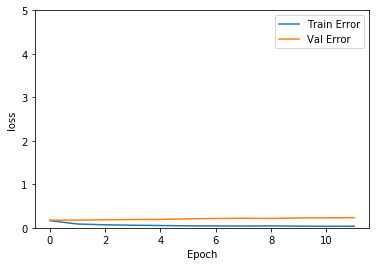

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing loss : {:5.2f} ".format(loss))
print("Testing accuracy : {:5.2f} ".format(accuracy))

Testing loss :  0.02 
Testing accuracy :  0.99 


Comparison:

Almost in all cases train error is more than compared to validation error in accuracy where as when compared loss it's reverse

Learning rate with o.1 gave the best results

and it took 11 iterations